In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import pickle

In [144]:
employeedataset_df = pd.read_csv('static/Datasets/employee_attrition_train.csv')

In [145]:
employeedataset_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,...,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,...,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,...,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,...,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,...,4,80,0,18,4,3,8,6,4,0


In [146]:
#cant do for this dataset
#g=sns.pairplot(employeedataset_df)

In [147]:
employeedataset_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,893.000000,1002.000000,934.000000,1029.000000,1029.0,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,...,1029.000000,1029.0,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,37.930571,800.528942,9.930407,2.892128,1.0,1024.367347,2.683188,66.680272,2.713314,2.043732,...,2.689990,80.0,0.822157,11.196307,2.782313,2.748299,6.942663,4.215743,2.119534,4.005831
std,9.395978,408.109828,8.421791,1.053541,0.0,606.301635,1.096829,20.474094,0.710146,1.118918,...,1.077767,0.0,0.874662,7.857581,1.283401,0.697278,6.068322,3.658595,3.108651,3.522574
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,458.250000,2.000000,2.000000,1.0,496.000000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,37.000000,801.500000,8.000000,3.000000,1.0,1019.000000,3.000000,67.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,44.000000,1162.000000,16.000000,4.000000,1.0,1553.000000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.000000,7.000000
max,60.000000,1496.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


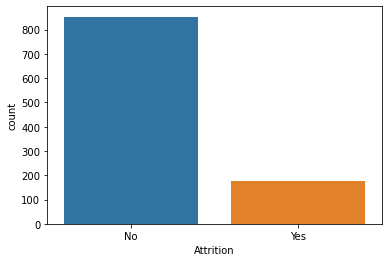

In [148]:
sns.countplot(x="Attrition", data=employeedataset_df)

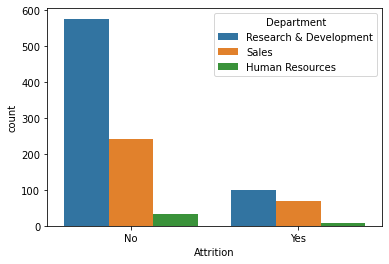

In [149]:
sns.countplot(x="Attrition", hue="Department", data=employeedataset_df)

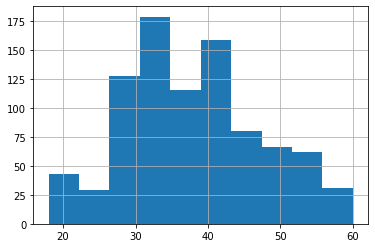

In [150]:
employeedataset_df["Age"].hist()
plt.show()

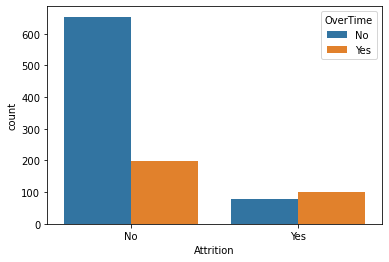

In [151]:
sns.countplot(x="Attrition", hue="OverTime", data=employeedataset_df)

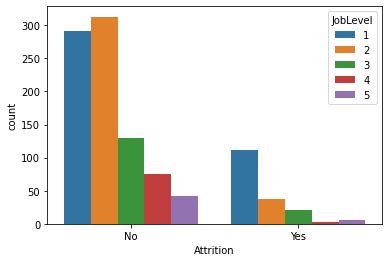

In [152]:
sns.countplot(x="Attrition", hue="JobLevel", data=employeedataset_df)

In [153]:
df1 = employeedataset_df.dropna()

In [154]:
#Machine Learning start
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()
logr

LogisticRegression()

In [155]:
#x and y values, dummies changed Over Time to 0 and 1 instead of Yes and No
#X = df1[['Age', 'DistanceFromHome', 'OverTime', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'StandardHours', 'TotalWorkingYears', 'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
X = df1[['Age', 'DistanceFromHome', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'StandardHours', 'TotalWorkingYears', 'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]
X = pd.get_dummies(X)
y = df1.Attrition

In [156]:
X.columns

Index(['Age', 'DistanceFromHome', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'StandardHours', 'TotalWorkingYears',
       'WorkLifeBalance', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [157]:
X

,Age,DistanceFromHome,JobLevel,JobSatisfaction,MonthlyIncome,StandardHours,TotalWorkingYears,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,1.0,4,4,17399,80,32,2,4,1,3
1,36.0,6.0,2,2,4941,80,7,3,2,0,1
2,21.0,7.0,1,2,2679,80,1,3,0,1,0
4,52.0,7.0,3,2,10445,80,18,3,6,4,0
5,33.0,15.0,3,3,13610,80,15,4,6,7,7
...,...,...,...,...,...,...,...,...,...,...,...
1020,41.0,2.0,4,1,16595,80,22,3,16,11,8
1021,33.0,22.0,2,2,6146,80,8,4,7,0,7
1023,33.0,28.0,2,3,5207,80,15,3,14,5,7
1027,29.0,13.0,2,2,4025,80,10,3,3,0,3


In [158]:
X.dtypes

Age                        float64
DistanceFromHome           float64
JobLevel                     int64
JobSatisfaction              int64
MonthlyIncome                int64
StandardHours                int64
TotalWorkingYears            int64
WorkLifeBalance              int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [159]:
# # This is the encoding test. Delete this if it breaks things!!
# # Encode y labels
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# le.fit(y)

# y = le.transform(y)

In [160]:
#split data
from sklearn.model_selection import train_test_split

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [162]:
# Fit Train model
logr.fit(X_train, y_train)

C:\Users\renie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [163]:
# save model data to csv
X_test.to_csv('model_X_test.csv')
pd.DataFrame(y_test).to_csv('model_y_test.csv')

In [164]:
len(X_test.columns)

11

In [165]:
# accuracy score

logr.score(X_test,y_test)


0.8350515463917526

In [166]:

logr.score(X_train,y_train)


0.8364888123924269

In [167]:

X_test.head()

,Age,DistanceFromHome,JobLevel,JobSatisfaction,MonthlyIncome,StandardHours,TotalWorkingYears,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
516,32.0,2.0,1,1,2827,80,1,3,0,0,0
240,29.0,1.0,1,4,2720,80,10,3,7,2,8
234,30.0,4.0,2,2,5209,80,11,2,8,2,7
257,39.0,4.0,2,3,5902,80,17,4,11,5,9
459,37.0,10.0,1,1,3452,80,17,3,4,0,3


In [168]:
#Predictions
predictions=logr.predict(X_test)
predictions

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'N

In [169]:
X_test[:5]

,Age,DistanceFromHome,JobLevel,JobSatisfaction,MonthlyIncome,StandardHours,TotalWorkingYears,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
516,32.0,2.0,1,1,2827,80,1,3,0,0,0
240,29.0,1.0,1,4,2720,80,10,3,7,2,8
234,30.0,4.0,2,2,5209,80,11,2,8,2,7
257,39.0,4.0,2,3,5902,80,17,4,11,5,9
459,37.0,10.0,1,1,3452,80,17,3,4,0,3


In [170]:
y_test[:5]

516    No
240    No
234    No
257    No
459    No
Name: Attrition, dtype: object

In [171]:
y_train.value_counts()

No     485
Yes     96
Name: Attrition, dtype: int64

In [172]:

from sklearn.metrics import classification_report

In [173]:
pred = pd.DataFrame(predictions)

In [174]:
pred.count()

0    194
dtype: int64

In [175]:
y_test[:10]

516     No
240     No
234     No
257     No
459     No
859     No
13      No
854    Yes
154     No
563     No
Name: Attrition, dtype: object

In [176]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.84      1.00      0.91       162
         Yes       0.00      0.00      0.00        32

    accuracy                           0.84       194
   macro avg       0.42      0.50      0.46       194
weighted avg       0.70      0.84      0.76       194



C:\Users\renie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [177]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

In [178]:

y_pred = logr.predict(X_test)
confusion_matrix(y_test, predictions)


array([[162,   0],
       [ 32,   0]], dtype=int64)

In [179]:
from sklearn.metrics import accuracy_score

In [180]:
accuracy_score(y_test,predictions)

0.8350515463917526

In [181]:

pickle.dump(logr,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))

In [182]:
#import joblib

#joblib.dump(model.fit(X_train, y_train),'logreg.mdl')

In [183]:
# model2 = pickle.load(open('model.pkl', 'rb')) # loading the trained model
# X_test = pd.read_csv('model_X_test.csv')
# y_test = pd.read_csv('model_y_test.csv')
# y_test = y_test['0']

# model_score = model2.score(X_test, y_test)
# print(model_score)